# Penarikan Kesimpulan dan Pengujian Hipotesis
## Tugas Besar IF2220 Probabilitas Statistika
Authors:
* Alif Bhadrika Parikesit - 13519186/K04
* Rezda Abdullah Fachrezzi - 13519194/K04

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from random import sample

%matplotlib inline

In [2]:
colname = ["id", "Daerah", "SumbuUtama", "SumbuKecil", "Keunikan", "AreaBulatan", "Diameter", "KadarAir", "Keliling", "Bulatan", "Ransum", "Kelas"]
data = pd.read_csv("Gandum.csv", names=colname)
data

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
1,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
2,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
3,4,4141,108.701190,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766961,2.197877,1
4,5,5273,122.747868,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,5083,120.083450,54.821580,0.889709,5179,80.447975,0.534827,286.377,0.778850,2.190441,2
496,497,4432,112.367050,51.294914,0.889726,4550,75.119889,0.601194,270.823,0.759344,2.190608,2
497,498,5020,119.873742,54.718545,0.889740,5104,79.947874,0.528421,285.799,0.772311,2.190733,2
498,499,4035,107.311728,48.930802,0.889996,4150,71.676506,0.584698,258.503,0.758791,2.193132,2


# 1. Descriptive Statistics
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis.

In [3]:
def createData(colname):
    attr = data[colname]
    desc = attr.describe()
    newData = [desc[1], desc[5], attr.mode()[0], desc[2], attr.var(), attr.max() - attr.min(), attr.min(), attr.max(), desc[4], desc[5], desc[6], desc[6] - desc[4], attr.skew(), attr.kurtosis()]
    return newData

In [4]:
descstats = []
for i in range (data.columns.size):
    if i in [0,11]:
        continue
    else:
        newdata = createData(data.columns[i])
        descstats.append(newdata)

In [5]:
descstats = pd.DataFrame(data=descstats, index=['Daerah','SumbuUtama', 'SumbuKecil', 'Keunikan', 'AreaBulatan', 'Diameter', 'KadarAir', 'Keliling', 'Bulatan', 'Ransum'], columns=['Mean', 'Median', 'Modus', 'STD', 'Variansi', 'Range', 'Min', 'Max', '25%', '50%', '75%', 'IQR', 'Skewness', 'Kurtosis']).transpose()
descstats

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
Mean,4801.246000,116.045171,53.715246,0.878764,4.937048e+03,77.771158,0.648372,281.479722,0.761737,2.150915
Median,4735.000000,115.405140,53.731199,0.890045,4.857000e+03,77.645277,0.626117,280.045500,0.761288,2.193599
Modus,3992.000000,74.133114,39.906517,0.719916,3.802000e+03,71.293564,0.735849,197.015000,0.174590,1.440796
STD,986.395491,18.282626,4.071075,0.036586,1.011696e+03,8.056867,0.094367,37.335402,0.061702,0.249767
Variansi,972976.065615,334.254412,16.573650,0.001339,1.023529e+06,64.913111,0.008905,1393.932221,0.003807,0.062383
Range,4931.000000,153.795469,29.071182,0.194085,5.141000e+03,40.747172,0.468972,291.822000,0.730158,1.024013
Min,2522.000000,74.133114,39.906517,0.719916,2.579000e+03,56.666658,0.409927,197.015000,0.174590,1.440796
Max,7453.000000,227.928583,68.977700,0.914001,7.720000e+03,97.413830,0.878899,488.837000,0.904748,2.464809
25%,4042.750000,104.116098,51.193576,0.863676,4.170250e+03,71.745308,0.572632,255.883000,0.731991,1.983939
50%,4735.000000,115.405140,53.731199,0.890045,4.857000e+03,77.645277,0.626117,280.045500,0.761288,2.193599


# 2. Distribution Plots
Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik.

In [6]:
def makeplot(name):
    fig, ax = plt.subplots(1,2)
    sns.histplot(data[name], kde=True, ax=ax[0])
    sns.boxplot(x=data[name], ax=ax[1])

### Visualisasi SumbuUtama

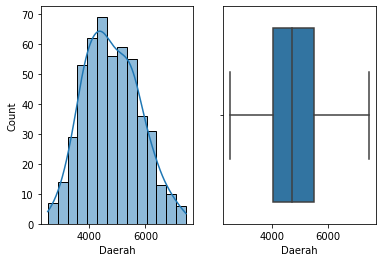

In [7]:
makeplot("Daerah")

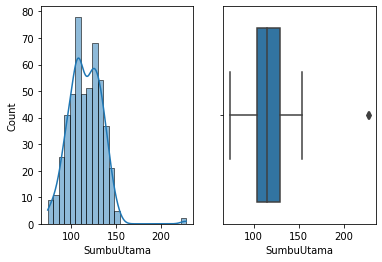

In [8]:
makeplot("SumbuUtama")

### Visualisasi SumbuKecil

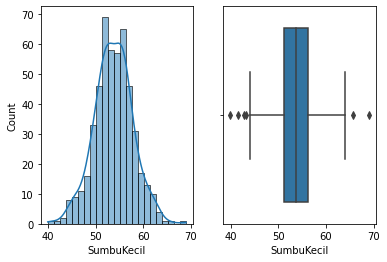

In [9]:
makeplot("SumbuKecil")

### Visualisasi Keunikan

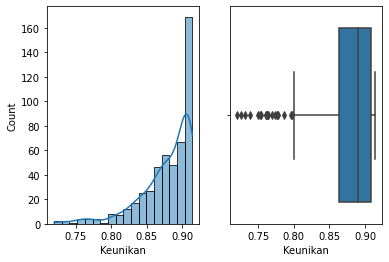

In [10]:
makeplot("Keunikan")

### Visualisasi AreaBulatan

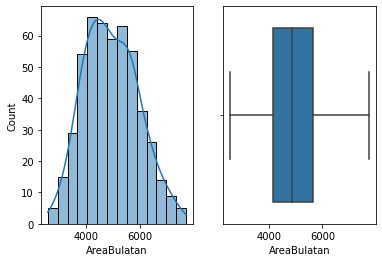

In [11]:
makeplot("AreaBulatan")

### Visualisasi Diameter

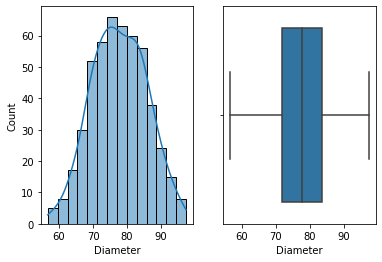

In [12]:
makeplot("Diameter")

### Visualisasi KadarAir

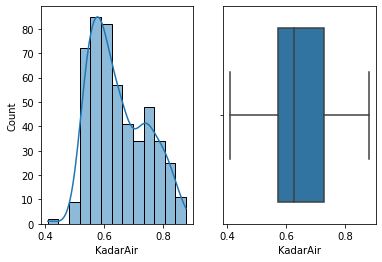

In [13]:
makeplot("KadarAir")

### Visualisasi Keliling

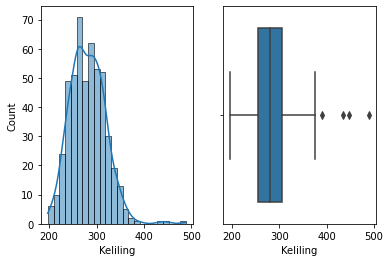

In [14]:
makeplot("Keliling")

### Visualisasi Bulatan

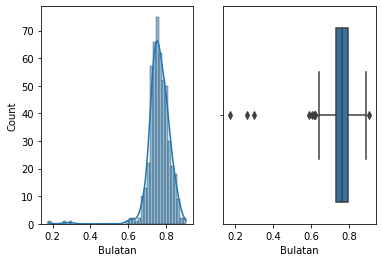

In [15]:
makeplot("Bulatan")

### Visualisasi Ransum

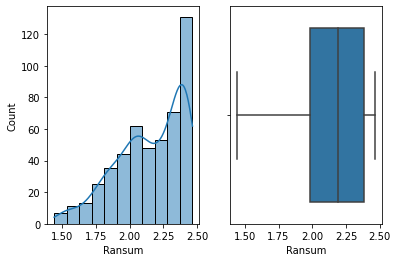

In [16]:
makeplot("Ransum")

# 3. Normality Test
Menentukan setiap kolom numerik berdistribusi normal atau tidak. 

Null hypothesis dipenuhi ketika p-value lebih besar dari alpha, dan ditolak jika p-value lebih kecil sama dengan alpha, 0.05. Ketika null hypothesis terpenuhi, maka sample data diambil dari populasi yang memenuhi Gaussian Normal Distribution.

In [17]:
alpha = 0.05

In [18]:
def normalityTest(colname): 
    global alpha 
    k, p = stats.normaltest(data[colname])
    if p > alpha:
        return True, p
    else:
        return False, p

In [19]:
resnormaltest = []
for i in range (data.columns.size):
    if i in [0,11]:
        continue
    else:
        isnormal, p = normalityTest(data.columns[i])
        resnormaltest.append((isnormal,p))

In [20]:
resnormaltest = pd.DataFrame(data=resnormaltest, index=['Daerah','SumbuUtama', 'SumbuKecil', 'Keunikan', 'AreaBulatan', 'Diameter', 'KadarAir', 'Keliling', 'Bulatan', 'Ransum'], columns=['IsNormal based on p-value', 'p-value'])

resnormaltest

,IsNormal based on p-value,p-value
Daerah,False,4.386272e-03
SumbuUtama,False,2.212743e-21
SumbuKecil,True,1.573634e-01
Keunikan,False,3.602971e-35
AreaBulatan,False,4.657059e-03
Diameter,False,2.415720e-02
KadarAir,False,2.586936e-11
Keliling,False,2.239013e-15
Bulatan,False,9.885276e-97
Ransum,False,8.963008e-09


### Checking for Normality on Daerah
Berdasarkan normality test, nilai p untuk kolom Daerah adalah p = 4.386272e-03 < 0.05. Jika dilihat dari visualisasi histogramnya pun,bentuknya tidak memenuhi kaidah distribusi normal melainkan sedikit terlihat positively skewed, sehingga kolom Daerah <b>tidak terdistribusi normal</b>. 

### Checking for Normality on SumbuUtama
Berdasarkan normality test, nilai p untuk kolom SumbuUtama adalah p = 2.033381e-21 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal melainkan sedikit terlihat positively skewed, sehingga kolom SumbuUtama <b>tidak terdistribusi normal</b>. 

### Checking for Normality on SumbuKecil
Berdasarkan normality test, nilai p untuk kolom SumbuUtama adalah p = 1.504938e-01 > 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya memenuhi kaidah distribusi normal, sehingga kolom SumbuKecil <b> terdistribusi normal</b>. 

### Checking for Normality on Keunikan
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 5.235534e-35 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, melainkan sedikit terlihat neagtively skewed, sehingga kolom Keunikan <b>tidak terdistribusi normal</b>. 

### Checking for Normality on AreaBulatan
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 4.689965e-03 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, melainkan terlihat positively skewed sehingga kolom AreaBulatan <b>tidak terdistribusi normal</b>

### Checking for Normality on Diameter
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 2.600459e-02 < 0.05. Jika dilihat dari visualisasi histogramnya pun, meskipun bentuknya agak terlihat simetris, namun dapat dilihat ada sedikit kecenderungan tergolong sebagai neagtively skewed dan didukung dengan nilai p yang mematahkan null hypotesis, sehingga kolom Diameter <b>tidak terdistribusi normal</b>

### Checking for Normality on KadarAir
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 2.145149e-11 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, melainkan sedikit memiliki kecenderungan tergolong sebagai negatively skewed sehingga kolom KadarAir <b>tidak terdistribusi normal</b>

### Checking for Normality on Keliling
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 1.747816e-15 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, melainkan sedikit terlihat positively skewed, sehingga kolom Keliling <b>tidak terdistribusi normal</b>

### Checking for Normality on Bulatan
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 1.304302e-96 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, melainkan terlihat neagtively skewed, sehingga kolom Bulatan <b>tidak terdistribusi normal</b>

### Checking for Normality on Ransum
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 8.913828e-09 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, melainkan terlihat neagtively skewed, sehingga kolom Ransum <b>tidak terdistribusi normal</b>

# 4. One Sample Hypothesis Test 

Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

In [25]:
# function to generate random idx in dataset 
# DISCLAIMER fungsi ini digunakan manual, tidak di run setiap program dijalankan sehingga hasil random yang didapatkan tidak berubah-ubah saat program dijalankan berulang-ulang
# output fungsi dicopy secara manual untuk keperluan mendapatkan sample acak dari populasi
def randomSample(colname,nSample):
    nPopulation = data[colname].count()
    randidx = sample(range(nPopulation),nSample)
    return randidx

# function to compute z score normal distribution
def computeZscore(colname, meansample, munol, N):
    attr = data[colname]
    zvalue = (meansample - munol)/(attr.std()/math.sqrt(N))
    return zvalue

### a. Nilai rata-rata Daerah di atas 4700?

#### Menentukan Hipotesis nol
H0 = μ = 4700

#### Menentukan Hipotesis alternatif
H1 = μ > 4700

#### Menentukan tingkat siginifikan α
α = 0.05

#### Menentukan uji statistik yang sesuai dan daerah kritis
Diketahui σ untuk Daerah adalah 986.395491 dengan x̄ sampel adalah 4773.15. Karena std diketahui, maka akan digunakan pencarian p-value dengan nilai z.

Daerah kritis H0 adalah z>z0.05=1.64

#### Menghitung data dari uji statistik beserta p-value
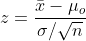

dengan n = 100 sampel, x̄ = 4773.15, μ = 4700, σ = 986.395491

didapat z = 0.7415889532313827 ≈ 0.742
serta p-valuenya p(Z>1.03) < 0.22904

#### Penentuan
Karena didapat z adalah 1.03 di mana 0.742 < 1.64, z berada di bawah daerah kritis maka kesimpulannya adalah tidak menolak H0.
Kesimpulan ini juga dapat diperkuat dengan fakta bahwa p-value sebesar 0.22904 lebih besar dari 0.05.

In [26]:
sample = [198,307,87,16,404,151,72,248,105,41,142,196,191,314,390,269,444,439,373,3,96,492,484,278,292,110,155,254,32,332,88,12,448,475,473,433,367,483,189,485,256,158,81,192,245,136,172,182,113,120,123,270,400,414,464,157,210,443,351,365,152,431,392,460,126,413,442,328,115,299,18,481,494,264,385,280,315,76,221,236,427,447,22,205,190,411,406,490,153,169,293,186,103,139,294,44,30,62,276,226]

reratasampel = data["Daerah"].iloc[sample].mean()
print("rata2 sampel", reratasampel)

zscoreDaerah = computeZscore('Daerah',reratasampel,4700,100)
print("z:", zscoreDaerah)

rata2 sampel 4773.15
z: 0.7415889532313827


<AxesSubplot:xlabel='Daerah'>

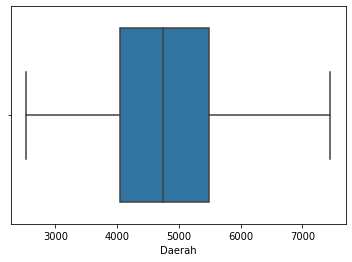

In [23]:
sns.boxplot(x=data['Daerah'])

### b. Nilai Rata-rata Sumbu Utama tidak sama dengan 116?

<br><b>Menentukan Hipotesis nol</b><br>

H0 : μ = 116

<br><b>Menentukan hipotesis alternatif H1</b><br>

H1 : μ ≠ 116

<br><b>Menentukan tingkat signifikan α</b><br>

α = 0.05

<br><b>Menentukan uji statistik yang sesuai dan daerah kritis</b><br>

Akan dilakukan uji statistik two-tailed test. Karena nilai σ diketahui untuk data Sumbu Utama, σ = 18.282626, maka nilai yang akan digunakan adalah nilai z untuk distribusi normal.<br><br>
<img src="https://latex.codecogs.com/png.latex?z&space;=&space;\frac{\bar{x}&space;-&space;\mu&space;_{o}}{\sigma&space;/\sqrt{n}}" title="z = \frac{\bar{x} - \mu _{o}}{\sigma /\sqrt{n}}" />

Dan daerah kritis 
<img src="https://latex.codecogs.com/png.latex?z&space;<&space;-&space;z_{\alpha/2}" title="z < - z_{\alpha/2}" />
atau
<img src="https://latex.codecogs.com/png.latex?z&space;>&space;z_{\alpha/2}" title="z > z_{\alpha/2}" />

Karena α = 0.05, maka daerah kritisnya berada pada  Z < -1.960 atau Z > 1.960.

<br><b>Menghitung nilai uji statistik dari data sample dan p-value sesuai dengan uji statistik yang
digunakan</b><br>

Diambil sample random dari data kolom Sumbu Utama, dengan n = 100 sampel, x̄ = 117.65299111609998, μ = 116, σ = 18.282626

Didapat z = 0.9041322181710543 ≈ 0.9. Kemudian karena tes yang dilakukan adalah two tailed test maka akan ditentukan P-Value dengan P-Value = 2P(Z > 0.9) = 0.365942

<br><b>Penentuan</b><br>
Tidak menolak H0, karena hasil nilai uji statistik, z-score = 0.9, di luar daerah kritis dan diperkuat fakta nilai P-Value = 0.365942 > 0.05. Sehingga, dapat kita ambil kesimpulan rata-rata sumbu utama adalah sama dengan 116.


In [30]:
# idxs sample didapatkan dari function randomSample
idx_sample_sbUtama = [40,166,377,265,87,230,116,476,86,179,272,403,299,263,137,171,127,61,466,77,75,173,364,296,396,104,237,363,345,374,388,47,102,130,22,432,214,219,283,55,318,277,459,65,198,469,106,2,357,362,192,41,121,259,316,158,197,398,256,442,190,332,178,463,448,324,64,36,492,258,142,208,328,449,54,3,8,46,145,226,100,49,248,180,452,88,126,425,10,82,456,429,326,350,499,151,206,218,381,122]

# rata-rata sample
mean_sample_sbUtama = data['SumbuUtama'].iloc[idx_sample_sbUtama].mean()

# zscore
zscoreSbUtama = computeZscore('SumbuUtama',mean_sample_sbUtama,116,100)
print("z = {}".format(zscoreSbUtama))

z = 0.9041322181710543


<AxesSubplot:xlabel='SumbuUtama'>

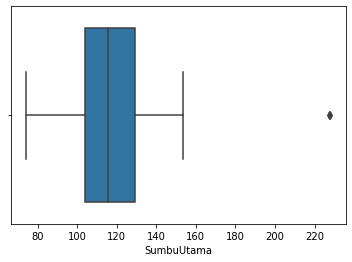

In [154]:
sns.boxplot(x=data['SumbuUtama'])

### d. Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?

<br><b>Menentukan Hipotesis nol</b><br>

H0 : P = 0.15

<br><b>Menentukan hipotesis alternatif H1</b><br>

H1 : P ≠ 0.15

<br><b>Menentukan tingkat signifikan α</b><br>

α = 0.05

<br><b>Menentukan uji statistik yang sesuai dan daerah kritis</b><br>

Perhatikan bahwa hipoteses alternatif menyatakan proporsi tidak sama dengan P0, maka akan dilakukan two-tailed test. Untuk nilai uji statistik, akan dilakukan dengan tes statistik Binomial yang didekati Normal, karena sampel yang dipilih cukup banyak yaitu n = 100.<br>
<img src="https://latex.codecogs.com/png.latex?z&space;=&space;\frac{\hat{p}&space;-&space;p_{0}}{\sqrt{p_{0}q_{0}/n}}" title="z = \frac{\hat{p} - p_{0}}{\sqrt{p_{0}q_{0}/n}}" /><br>
Dengan daerah kritis 
<img src="https://latex.codecogs.com/png.latex?z&space;<&space;-&space;z_{\alpha/2}" title="z < - z_{\alpha/2}" />
atau
<img src="https://latex.codecogs.com/png.latex?z&space;>&space;z_{\alpha/2}" title="z > z_{\alpha/2}" /><br>
Karena α = 0.05, maka daerah kritisnya berada pada  Z < -1.960 atau Z > 1.960.

<br><b>Menghitung nilai uji statistik dari data sample dan p-value sesuai dengan uji statistik yang
digunakan</b><br>
Berdasarkan perhitungan di bawah ini, didapat  peluang diameter > 85 dari n = 100 sample p̂ = 0.18. Dengan p0 = 0.15,q0 = 1 - 0.15 = 0.85, dan p̂ = 0.18 akan dihitung nilai uji statistik z dengan formula z Binomial yang didekati Normal.<br>

Didapatkan hasil z = 0.8401680504168058 ≈ 0.84. Kemudian karena tes yang dilakukan adalah two tailed test maka akan ditentukan P-Value dengan P-Value = 2P(Z > 0.84) = 0.400908

<br><b>Penentuan</b><br>
Tidak menolak H0, karena hasil nilai uji statistik, z-score = 0.84, di luar daerah kritis dan diperkuat fakta nilai P-Value = 0.400908 > 0.05. Sehingga, dapat kita ambil kesimpulan Proporsi nilai diameter yang lebih dari 85 bernilai 15%. 

In [31]:
# generate sample random dengan sampleRandom
idx_sample_Diameter = [131,495,462,81,473,103,244,112,312,77,70,94,375,445,433,36,465,468,190,183,471,365,367,55,479,386,6,378,17,389,287,373,300,408,165,405,162,24,334,138,99,315,102,121,219,278,35,241,267,28,4,71,47,106,331,237,323,202,186,153,125,249,346,8,292,426,374,260,383,154,179,476,110,258,205,269,62,207,156,481,416,227,339,74,394,66,403,135,277,139,442,88,253,75,255,274,68,391,285,324]

# random sample
sample_diameter = data['Diameter'].iloc[idx_sample_Diameter]
# data dengan diameter di atas 85 diambil dari sample 
sample_diameter_above85 =  sample_diameter.loc[sample_diameter > 85]

# peluang p̂ diameter di atas 85 dari sample
p = sample_diameter_above85.count()/sample_diameter.count() #p = 0.18

# menghitung z score dengan Binomial yang didekati Normal
po = 0.15
n = 100
qo = 1 - 0.15
zscoreDiameter = (p - po)/math.sqrt(po*qo/n)
print("z =",zscoreDiameter)

z = 0.8401680504168058


<AxesSubplot:xlabel='Diameter'>

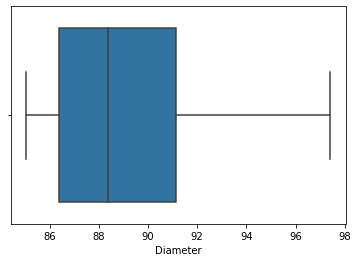

In [151]:
# boxplot diameter > 85
sns.boxplot(x=data['Diameter'].loc[data['Diameter'] > 85])

# 5. Two Sample Hypothesis Test 

Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

### a. Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom, benarkah rata-rata kedua bagian tersebut sama?

<br><b>Menentukan Hipotesis nol</b><br>
Dengan μ1 adalah rata-rata bagian awal (atas) kolom, dan μ2 adalah rata-rata bagian akhir (bawah) kolom,<br>
H0 : μ1 - μ2 = 0

<br><b>Menentukan hipotesis alternatif H1</b><br>

H1 : μ1 - μ2 ≠ 0

<br><b>Menentukan tingkat signifikan α</b><br>

α = 0.05

<br><b>Menentukan uji statistik yang sesuai dan daerah kritis</b><br>

Uji statistik dilakukan dengan two tailed test. Karena nilai standar deviasi kedua sampel diketahui, yaitu σ1 = 867.0254356176825 dan σ2 = 738.5664658199254, maka uji statistik dilakukan dengan mencari nilai uji statistik z dengan formula<br>
<img src="https://latex.codecogs.com/png.latex?z&space;=&space;\frac{(\bar{x_{1}}&space;-&space;\bar{x_{2}})-d_{0}}{\sqrt{\sigma_{1}^{2}/n_{1}&space;&plus;&space;\sigma_{2}^{2}/n_{2}}}" title="z = \frac{(\bar{x_{1}} - \bar{x_{2}})-d_{0}}{\sqrt{\sigma_{1}^{2}/n_{1} + \sigma_{2}^{2}/n_{2}}}" /><br>

Dengan daerah kritis 
<img src="https://latex.codecogs.com/png.latex?z&space;<&space;-&space;z_{\alpha/2}" title="z < - z_{\alpha/2}" />
atau
<img src="https://latex.codecogs.com/png.latex?z&space;>&space;z_{\alpha/2}" title="z > z_{\alpha/2}" /><br>
Karena α = 0.05, maka daerah kritisnya berada pada  Z < -1.960 atau Z > 1.960.

<br><b>Menghitung nilai uji statistik dari data sample dan p-value sesuai dengan uji statistik yang
digunakan</b><br>
Nilai yang telah diketahui, σ1 = 867.02543561768, σ2 = 738.5664658199254, n1 = n2 = 250, d0 = μ1 - μ2 = 0, x̄1 = 5549.804, dan x̄2 = 4324.292

Berdasarkan perhitungan di bawah ini, maka didapat z = 17.013036648485464 ≈ 17.01. Kemudian akan ditentukan nilai P-Value = 2P(Z > 17.01) = 0.00001. 

<br><b>Penentuan</b><br>
Menolak H0, karena hasil nilai uji statistik, z-score = 17.01, berada di dalam daerah kritis dan diperkuat fakta nilai P-Value sangat kecil = 0.00001 < 0.05. Sehingga, dapat kita ambil kesimpulan jika AreaBulatan dibagi menjadi 2 bagian yang sama jumlahnya, maka bagian awal dan akhir data tidak memiliki nilai rata-rata yang sama.

In [35]:
nPopulation = data['AreaBulatan'].count()

# area atas dan bawah AreaBulatan jika populasi AreaBulatan dibagi 2 sama rata
atasAreaBulatan = data['AreaBulatan'].iloc[range(int(nPopulation/2))]
bawahAreaBulatan = data['AreaBulatan'].iloc[range(int((nPopulation/2)),nPopulation)]

# σ1 adalah standar deviasi bagian atas dan σ2 standar deviasi bagian bawah
sigma1 = atasAreaBulatan.std()
sigma2 = bawahAreaBulatan.std()

# x̄1 dan x̄2 dari data bagian atas dan bawah
mean1 = atasAreaBulatan.mean()
mean2 = bawahAreaBulatan.mean()

# menghitung z score area bulatan
d0 = 0
n1 = atasAreaBulatan.count()
n2 = bawahAreaBulatan.count()
zscoreAreaBulatan = ((mean1 - mean2) - d0)/math.sqrt(math.pow(sigma1,2)/n1 + math.pow(sigma2,2)/n2)
print("z =",zscoreAreaBulatan)

z = 17.013036648485464


[Text(0.5, 0, 'Area Bulatan Akhir')]

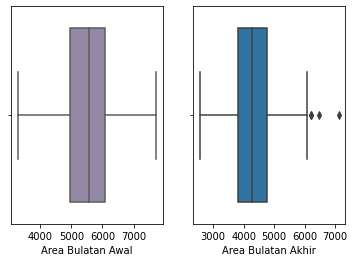

In [179]:
# boxplot data area bulatan bagian awal dan akhir
fig, ax = plt.subplots(1,2)
sns.boxplot(x=atasAreaBulatan, ax=ax[0], color='#9184aa').set(xlabel='Area Bulatan Awal')
sns.boxplot(x=bawahAreaBulatan, ax=ax[1]).set(xlabel='Area Bulatan Akhir')

### c. Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?

<br><b>Menentukan Hipotesis nol</b><br>
Dengan μ1 adalah rata-rata bagian 20 baris pertama (atas) kolom, dan μ2 adalah rata-rata bagian 20 baris terakhir (bawah) kolom,<br>
H0 : μ1 - μ2 = 0

<br><b>Menentukan hipotesis alternatif H1</b><br>

H1 : μ1 - μ2 ≠ 0

<br><b>Menentukan tingkat signifikan α</b><br>

α = 0.05

<br><b>Menentukan uji statistik yang sesuai dan daerah kritis</b><br>

Uji statistik dilakukan dengan two tailed test. Karena nilai standar deviasi kedua sampel diketahui, yaitu σ1 = 867.0254356176825 dan σ2 = 738.5664658199254, maka uji statistik dilakukan dengan mencari nilai uji statistik z dengan formula<br>
<img src="https://latex.codecogs.com/png.latex?z&space;=&space;\frac{(\bar{x_{1}}&space;-&space;\bar{x_{2}})-d_{0}}{\sqrt{\sigma_{1}^{2}/n_{1}&space;&plus;&space;\sigma_{2}^{2}/n_{2}}}" title="z = \frac{(\bar{x_{1}} - \bar{x_{2}})-d_{0}}{\sqrt{\sigma_{1}^{2}/n_{1} + \sigma_{2}^{2}/n_{2}}}" /><br>

Dengan daerah kritis 
<img src="https://latex.codecogs.com/png.latex?z&space;<&space;-&space;z_{\alpha/2}" title="z < - z_{\alpha/2}" />
atau
<img src="https://latex.codecogs.com/png.latex?z&space;>&space;z_{\alpha/2}" title="z > z_{\alpha/2}" /><br>
Karena α = 0.05, maka daerah kritisnya berada pada  Z < -1.960 atau Z > 1.960.

<br><b>Menghitung nilai uji statistik dari data sample dan p-value sesuai dengan uji statistik yang
digunakan</b><br>
Nilai yang telah diketahui, σ1 = 0.03038477583561707, σ2 = 0.025115057347653777, n1 = n2 = 250, d0 = μ1 - μ2 = 0, x̄1 = 0.73753535525, dan x̄2 = 0.767322437

Berdasarkan perhitungan di bawah ini, maka didapat z = -3.3792268633123896 ≈ -3.38. Kemudian akan ditentukan nilai P-Value = 2P(Z < -3.38) = 0.000725.

<br><b>Penentuan</b><br>
Menolak H0, karena hasil nilai uji statistik, z-score = -3.38, berada di dalam daerah kritis dan diperkuat fakta nilai P-Value sangat kecil = 0.000725 < 0.05. Sehingga, dapat kita ambil kesimpulan jika 20 baris pertama kolom Bulatan tidak memiliki nilai rata-rata yang sama dengan 20 baris terakhirnya.

In [36]:
nPopulation = data['Bulatan'].count()

# area 20 atas dan 20 bawah Bulatan 
atasBulatan = data['Bulatan'].head(n=20)
bawahBulatan = data['Bulatan'].tail(n=20)

# σ1 adalah standar deviasi bagian 20 atas dan σ2 standar deviasi bagian 20 bawah
sigma1blt = atasBulatan.std()
sigma2blt = bawahBulatan.std()

# x̄1 dan x̄2 dari data bagian atas dan bawah
mean1blt = atasBulatan.mean()
mean2blt = bawahBulatan.mean()

# menghitung z score area bulatan
d0 = 0
n1 = atasBulatan.count()
n2 = bawahBulatan.count()
zscoreBulatan = ((mean1blt - mean2blt) - d0)/math.sqrt(math.pow(sigma1blt,2)/n1 + math.pow(sigma2blt,2)/n2)
print("z =",zscoreBulatan)

z = -3.3792268633123896


[Text(0.5, 0, 'Area Bulatan Akhir')]

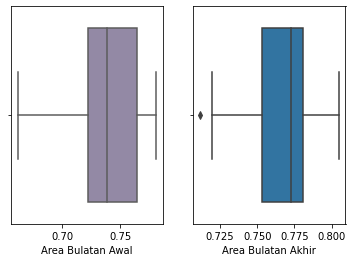

In [206]:
# boxplot data bulatan bagian 20 awal dan 20 akhir
fig, ax = plt.subplots(1,2)
sns.boxplot(x=atasBulatan, ax=ax[0], color='#9184aa').set(xlabel='Bulatan Awal')
sns.boxplot(x=bawahBulatan, ax=ax[1]).set(xlabel='Bulatan Akhir')

### e. Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?

<br><b>Menentukan Hipotesis nol</b><br>
Dengan σ1<sup>2</sup> adalah variansi bagian awal (atas) kolom, dan σ2<sup>2</sup> adalah variansi bagian akhir (bawah) kolom,<br>
H0 : σ1<sup>2</sup> - σ2<sup>2</sup> = 0

<br><b>Menentukan hipotesis alternatif H1</b><br>

H1 : σ2<sup>2</sup> - σ2<sup>2</sup> ≠ 0

<br><b>Menentukan tingkat signifikan α</b><br>

α = 0.05

<br><b>Menentukan uji statistik yang sesuai dan daerah kritis</b><br>

Pengujian statistik untuk uji variansi ini dilakukan dengan uji statistik distribusi f dengan formula,<br>
<img src="https://latex.codecogs.com/png.latex?f&space;=&space;\frac{s_{1}^{2}}{s_{2}^{2}}" title="f = \frac{s_{1}^{2}}{s_{2}^{2}}" /><br>


Dengan daerah kritis 
<img src="https://latex.codecogs.com/png.latex?f&space;<&space;f_{1-&space;\alpha/2}(v_{1},v_{2})" title="f < f_{1- \alpha/2}(v_{1},v_{2})" />
atau
<img src="https://latex.codecogs.com/png.latex?f&space;>&space;f_{\alpha/2}(v_{1},v_{2})" title="f > f_{\alpha/2}(v_{1},v_{2})" /><br>

Pada pengujian hipotesis ini, akan digunakan sampel dari data bagian awal n1 = 5, dan sampel dari data bagian akhir n2 = 5. v1 adalah degree of freedom bagian awal, v1 = n1 - 1 = 4. Sedangkan v2 adalah degree of freedom bagian akhir, v2 = n2 - 1 =  4. Dengan α = 0.05, maka daerah kritisnya berada pada  f < 0.104 atau f > 9.605.

<br><b>Menghitung nilai uji statistik dari data sample dan p-value sesuai dengan uji statistik yang
digunakan</b><br>
Nilai yang diketahui, yaitu σ1 = s1 = 5.797501951712654, dan σ2 = s2 6.179706008665024. Maka f = 0.8801286893889059 ≈ 0.88. Kemudian nilai P-Value = 2P(f < 0.88) = 2*0.4522 = 0.9044

<br><b>Penentuan</b><br>
Tidak menolak H0, karena hasil nilai uji statistik, f = 0.88, berada di dalam daerah kritis dan diperkuat fakta nilai P-Value = 0.9044 < 0.05. Sehingga, dapat kita ambil kesimpulan jika nilai variansi kolom diameter awal dan akhir memiliki nilai yang sama.

In [37]:
# area atas dan bawah Diameter jika populasi AreaBulatan dibagi 2 sama rata
atasDiameter = data['Diameter'].head()
bawahDiameter = data['Diameter'].tail()

# simpangan baku bagian atas dan bawah
s1 = atasDiameter.std()
s2 = bawahDiameter.std()

# menghitung f
f = math.pow(s1,2)/math.pow(s2,2)
print("f =",f)

f = 0.8801286893889059


[Text(0.5, 0, 'Diameter Akhir')]

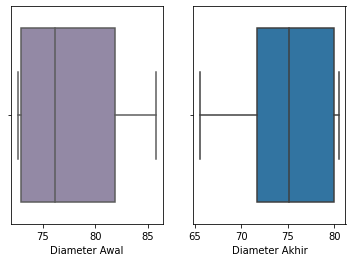

In [219]:
# boxplot data diameter bagian awal dan akhir
fig, ax = plt.subplots(1,2)
sns.boxplot(x=atasDiameter, ax=ax[0], color='#9184aa').set(xlabel='Diameter Awal')
sns.boxplot(x=bawahDiameter, ax=ax[1]).set(xlabel='Diameter Akhir')

# 6. Correlation Test

Mentukan apakah setiap kolom non-target berkorelasi dengan kolom target, yaitu kolom Kelas
dengan menggambarkan juga scatter plot nya.

Berikut ini adalah correlation setiap kolom pada dataset Gandum.csv

In [28]:
data.loc[:, data.columns != 'id'].corr()

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
Daerah,1.000000,0.900374,0.807427,0.623023,0.997242,0.997963,-0.110243,0.881662,-0.389929,0.662482,-0.602747
SumbuUtama,0.900374,1.000000,0.580837,0.759118,0.902007,0.903146,-0.135363,0.850753,-0.499682,0.792583,-0.713091
SumbuKecil,0.807427,0.580837,1.000000,0.078605,0.806536,0.804706,-0.027475,0.657753,-0.105894,0.106648,-0.152975
Keunikan,0.623023,0.759118,0.078605,1.000000,0.625055,0.636689,-0.159963,0.660141,-0.563362,0.968624,-0.730456
AreaBulatan,0.997242,0.902007,0.806536,0.625055,1.000000,0.994744,-0.124494,0.911196,-0.447149,0.664747,-0.607313
Diameter,0.997963,0.903146,0.804706,0.636689,0.994744,1.000000,-0.107778,0.880715,-0.386644,0.670744,-0.602536
KadarAir,-0.110243,-0.135363,-0.027475,-0.159963,-0.124494,-0.107778,1.000000,-0.209587,0.290969,-0.166166,0.134344
Keliling,0.881662,0.850753,0.657753,0.660141,0.911196,0.880715,-0.209587,1.000000,-0.752436,0.696816,-0.634861
Bulatan,-0.389929,-0.499682,-0.105894,-0.563362,-0.447149,-0.386644,0.290969,-0.752436,1.000000,-0.592790,0.545005
Ransum,0.662482,0.792583,0.106648,0.968624,0.664747,0.670744,-0.166166,0.696816,-0.592790,1.000000,-0.839904


Sedangkan berikut ini, merupakan nilai correlation setiap kolom non target dengan kolom target Kelas.

In [38]:
corrwithKelas = data[data.columns[1:]].corr()['Kelas'][:-1]
corrwithKelas = pd.DataFrame(data=corrwithKelas)
corrwithKelas.rename(columns={'Kelas' : 'Correlation Coefficient with Kelas'}, inplace = False)

,Correlation Coefficient with Kelas
Daerah,-0.602747
SumbuUtama,-0.713091
SumbuKecil,-0.152975
Keunikan,-0.730456
AreaBulatan,-0.607313
Diameter,-0.602536
KadarAir,0.134344
Keliling,-0.634861
Bulatan,0.545005
Ransum,-0.839904


In [39]:
def scatterplotKelaswith(colname):
    data.plot(kind='scatter', x=colname, y='Kelas')
    plt.show()

### Correlation Daerah & Kelas

Nilai koefisien correlation Daerah dan Kelas adalah -0.602747. Sehingga Daerah dan Kelas saling berkorelasi negatif (anti-correlation), artinya ketika nilai Daerah meningkat maka nilai Kelas menurun dan sebaliknya.   

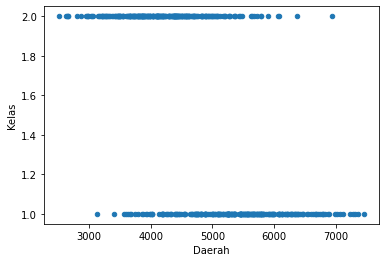

In [40]:
scatterplotKelaswith('Daerah')

### Correlation Sumbu Utama & Kelas

Nilai koefisien correlation Sumbu Utama dan Kelas adalah . Sehingga Sumbu Utama dan Kelas saling berkorelasi negatif (anti-correlation), artinya ketika nilai Sumbu Utama meningkat maka nilai Kelas menurun dan sebaliknya.

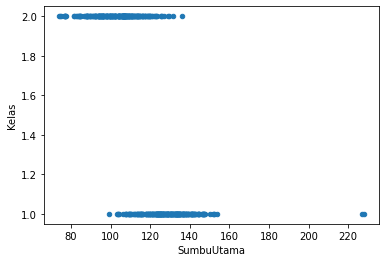

In [41]:
scatterplotKelaswith('SumbuUtama')

### Correlation Sumbu Kecil & Kelas

Nilai koefisien correlation Sumbu Kecil dan Kelas adalah -0.152975. Sehingga Sumbu Kecil dan Kelas saling berkorelasi negatif (anti-correlation), artinya ketika nilai Sumbu Kecil meningkat maka nilai Kelas menurun dan sebaliknya.

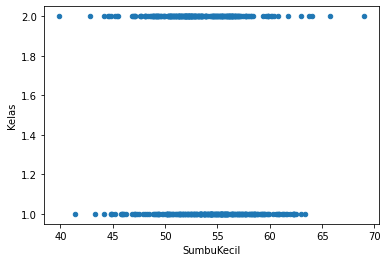

In [42]:
scatterplotKelaswith('SumbuKecil')

### Correlation Keunikan & Kelas

Nilai koefisien correlation Keunikan dan Kelas adalah -0.730456. Sehingga Keunikan dan Kelas saling berkorelasi negatif (anti-correlation), artinya ketika nilai Keunikan meningkat maka nilai Kelas menurun dan sebaliknya.

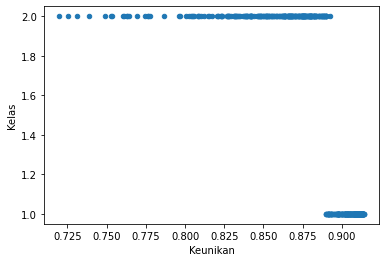

In [43]:
scatterplotKelaswith('Keunikan')

### Correlation Area Bulatan & Kelas

Nilai koefisien correlation Area Bulatan dan Kelas adalah -0.607313. Sehingga Area Bulatan dan Kelas saling berkorelasi negatif (anti-correlation), artinya ketika nilai Area Bulatan meningkat maka nilai Kelas menurun dan sebaliknya.

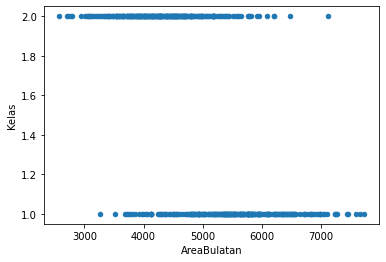

In [44]:
scatterplotKelaswith('AreaBulatan')